In [ ]:
!pip install pandas scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
data = pd.read_csv("/content/spamham.csv", encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
X=data['v2']
y=data['v1']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [7]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [8]:
y_pred = nb_classifier.predict(X_test_tfidf)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Confusion Matrix:
[[965   0]
 [ 42 108]]


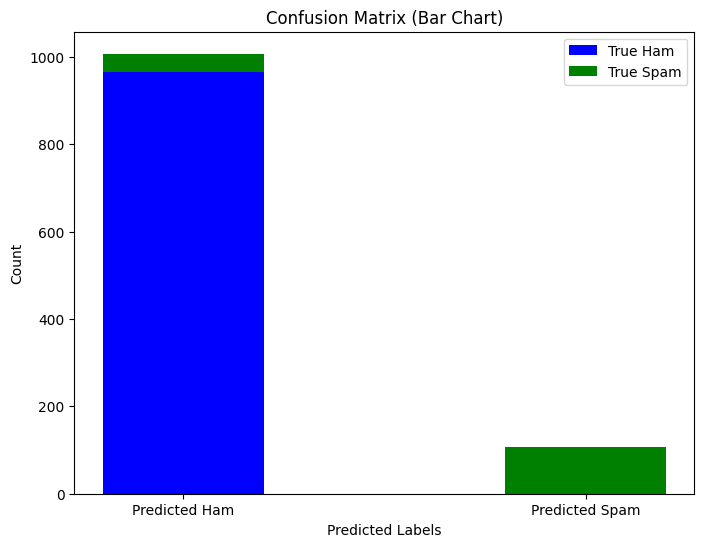

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a bar chart for the confusion matrix
plt.figure(figsize=(8, 6))
plt.bar(range(2), conf_matrix[0], color='b', width=0.4, label='True Ham')
plt.bar(range(2), conf_matrix[1], bottom=conf_matrix[0], color='g', width=0.4, label='True Spam')
plt.xticks(range(2), ['Predicted Ham', 'Predicted Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Confusion Matrix (Bar Chart)')
plt.legend(loc='best')
plt.show()

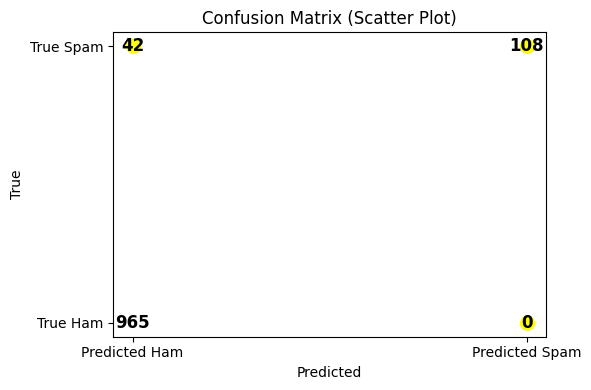

In [11]:
plt.figure(figsize=(6, 4))
for i in range(2):
    for j in range(2):
        text_color = 'white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'yellow'
        plt.scatter(j, i, s=100, color=text_color, marker='o')
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", verticalalignment="center", color='black', fontsize=12, weight='bold')

plt.xticks([0, 1], ['Predicted Ham', 'Predicted Spam'])
plt.yticks([0, 1], ['True Ham', 'True Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Scatter Plot)')
plt.tight_layout()
plt.show()


In [15]:
input_messages = [
    "Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! ",
    "Dont worry. I guess he's busy..",
    "URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only",
]
classifications = []
for message in input_messages:
    input_data = [message]
    input_data_tfidf = tfidf_vectorizer.transform(input_data)
    prediction = nb_classifier.predict(input_data_tfidf)
    classifications.append(prediction[0])
for i, message in enumerate(input_messages):
    if classifications[i] == 'spam':
        print(f"Message {i + 1}: '{message}' is classified as SPAM.")
    else:
        print(f"Message {i + 1}: '{message}' is classified as HAM (not spam).")

Message 1: 'Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! ' is classified as SPAM.
Message 2: 'Dont worry. I guess he's busy..' is classified as HAM (not spam).
Message 3: 'URGENT! We are trying to contact you. Last weekends draw shows that you have won a å£900 prize GUARANTEED. Call 09061701939. Claim code S89. Valid 12hrs only' is classified as SPAM.
